# Lead Scoring Case Study

### Steps
    - Importing the libraries
    - Loading the dataset
    - Understanding the problem statement
    - Data understanding
    - Missing value check
    - EDA
    - Preprocessing - Dummy creation
    - Train-Test Split
    - Scaling
    - Feature Selection - RFE
    - Modeling
    - Manual Feature selection 
    - Model evaluation

#### Importing the libraries

In [10]:
### Libraries for Data Analysis and numerical functions
import numpy      as np
import pandas     as pd

### Libraries for Data visualization
import matplotlib.pyplot as plt
import seaborn           as sns

### Supress warnings
import warnings
warnings.filterwarnings("ignore")

### Logistic regression Libraries
import statsmodels
import statsmodels.api    as sm
from   statsmodels.stats.outliers_influence  import variance_inflation_factor

### Sci-kit Libraries
import sklearn
from   sklearn.linear_model      import  LogisticRegression
from   sklearn.preprocessing     import  StandardScaler
from   sklearn.feature_selection import  RFE
from   sklearn.model_selection   import  train_test_split

### Libraries for Mectrics
from   sklearn                   import  metrics
from   sklearn.metrics           import  r2_score
from   sklearn.metrics           import  precision_score, recall_score
from   sklearn.metrics           import  precision_recall_curve

#### Loading the dataset

In [12]:
Leads = pd.read_csv("Leads.csv")
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Problem Statement:

##### Select the most promising Leads for the online Education platform, that are most likely to convert into paying customers. The company requires to build a model where in you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower score have a lower conversion rate. The target lead conversion rate is expected to be around 80%.   #####

#### Understanding the data

In [15]:
Leads.shape

(9240, 37)

In [16]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Checking missing values

In [18]:
def null_percentage(column):
    return column.isnull().mean() * 100

Leads_null = Leads.apply(null_percentage)
Leads_null = Leads_null[Leads_null > 30]
print(Leads_null)

Tags                           36.287879
Lead Quality                   51.590909
Asymmetrique Activity Index    45.649351
Asymmetrique Profile Index     45.649351
Asymmetrique Activity Score    45.649351
Asymmetrique Profile Score     45.649351
dtype: float64


In [19]:
### Drop columns having missing values greater than 30% of the data
drop_null_cols = Leads_null.index
Leads.drop(columns=drop_null_cols, axis=1, inplace=True)

In [20]:
### Shape of the dataset after dropping columns greater than 30% null values
Leads.shape

(9240, 31)

In [21]:
Leads_null = Leads.apply(null_percentage)
Leads_null = Leads_null[Leads_null > 0].sort_values(ascending=False)
print(Leads_null)

What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
dtype: float64


In [22]:
for i in Leads.columns:
    col_det = Leads[i].value_counts()
    print(col_det)

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64
Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: count, Length: 9240, dtype: int64
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search

In [23]:
#### Drop columns not necessary for Analysis
#### Prospect ID is a unique ID and not required for analysis
Leads = Leads.drop("Prospect ID", axis = 1)

In [24]:
### Dropping columns having not much variation. Features having not much variation does not make sense in analysis as it would be skewed.
drop_cols1 = ["Do Not Call", "What matters most to you in choosing a course", "Search", "Magazine", "Newspaper Article",
              "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations", "Receive More Updates About Our Courses",
              "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque"]

In [25]:
Leads = Leads.drop(drop_cols1, axis=1)
Leads.shape

(9240, 17)

In [26]:
Leads_null = Leads.apply(null_percentage)
Leads_null = Leads_null[Leads_null > 0].sort_values(ascending=False)
print(Leads_null)

Lead Profile                          29.318182
What is your current occupation       29.112554
Country                               26.634199
How did you hear about X Education    23.885281
Specialization                        15.562771
City                                  15.367965
TotalVisits                            1.482684
Page Views Per Visit                   1.482684
Last Activity                          1.114719
Lead Source                            0.389610
dtype: float64


In [27]:
Leads["Lead Profile"].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [28]:
### The feature, "Lead Profile" contains maximum number of values as 'Select'. 
### This means the value was not selected and can be treated as missing value and can be dropped.
Leads = Leads.drop("Lead Profile", axis=1)

In [29]:
Leads["What is your current occupation"].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [30]:
Leads["How did you hear about X Education"].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [31]:
### The feature, "How did you hear about X Education" contains maximum number of values as 'Select'. 
### This means the value was not selected and can be treated as missing value and can be dropped.
Leads = Leads.drop("How did you hear about X Education", axis=1)

In [32]:
Leads["Specialization"].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [33]:
### The feature, "Specialization" contains maximum number of values as 'Select'. 
### This means the value was not selected and can be treated as missing value and can be dropped.
Leads = Leads.drop("Specialization", axis=1)

In [34]:
Leads_null = Leads.apply(null_percentage)
Leads_null = Leads_null[Leads_null > 0].sort_values(ascending=False)
print(Leads_null)

What is your current occupation    29.112554
Country                            26.634199
City                               15.367965
TotalVisits                         1.482684
Page Views Per Visit                1.482684
Last Activity                       1.114719
Lead Source                         0.389610
dtype: float64


In [35]:
#### As the X company is offering online education, the location need not matter. 
#### So the features, 'Country' and 'City' does not add value in the analysis and can be considered for removing
Leads = Leads.drop(["Country", "City"], axis=1)

In [36]:
Leads["What is your current occupation"].isnull().sum()

2690

In [37]:
#### The feature "What is your current occupation" is having over 2690 missing values which is about 29% of the data. 
#### So removing the rows having missing values for this column.
Leads = Leads[~(Leads["What is your current occupation"].isnull())]

In [38]:
Leads_null = Leads.apply(null_percentage)
Leads_null = Leads_null[Leads_null > 0].sort_values(ascending=False)
print(Leads_null)

TotalVisits             1.984733
Page Views Per Visit    1.984733
Last Activity           1.572519
Lead Source             0.549618
dtype: float64


In [39]:
Leads.shape

(6550, 12)

In [40]:
for i in Leads_null.index:
    print(Leads[i].value_counts())

TotalVisits
0.0      1375
2.0      1228
3.0       940
4.0       825
5.0       578
6.0       337
1.0       270
7.0       225
8.0       163
9.0       128
10.0       76
11.0       70
13.0       39
12.0       31
14.0       28
16.0       16
15.0       14
17.0       12
18.0       12
20.0       10
19.0        6
21.0        5
23.0        5
27.0        5
25.0        3
24.0        3
22.0        3
29.0        2
26.0        2
30.0        1
55.0        1
43.0        1
74.0        1
115.0       1
251.0       1
32.0        1
28.0        1
42.0        1
Name: count, dtype: int64
Page Views Per Visit
0.00     1375
2.00     1329
3.00      875
4.00      660
1.00      433
         ... 
2.56        1
4.75        1
16.00       1
6.33        1
2.08        1
Name: count, Length: 107, dtype: int64
Last Activity
Email Opened                    2460
SMS Sent                        2213
Page Visited on Website          429
Olark Chat Conversation          428
Converted to Lead                296
Email Bounced    

In [41]:
### Imputing missing values with median 
Leads["TotalVisits"] = Leads["TotalVisits"].fillna(Leads["TotalVisits"].median())

In [42]:
### Imputing missing values with median
Leads["Page Views Per Visit"] = Leads["Page Views Per Visit"].fillna(Leads["Page Views Per Visit"].median())

In [43]:
### Imputing missing values with mode
Leads["Last Activity"] = Leads["Last Activity"].fillna(Leads["Last Activity"].mode()[0])

In [44]:
### Imputing missing values with mode
Leads["Lead Source"] = Leads["Lead Source"].fillna(Leads["Lead Source"].mode()[0])

In [45]:
Leads.isnull().sum()

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

#### Data Preparation/Preprocessing

#### Create dummy variables for categorical columns with multiple levels

In [48]:
Leads = Leads.rename(columns={"What is your current occupation": "Curr_occu",
                              "A free copy of Mastering The Interview": "Mastering_Interview"})

In [49]:
### Create a list for deriving dummy variables
dummy_list = ["Lead Origin", "Lead Source", "Do Not Email", "Last Activity", "Curr_occu", "Mastering_Interview", "Last Notable Activity"]

In [50]:
def get_dummy_var(df, column):
    return pd.get_dummies(df, columns=column, prefix=column, dtype=int, drop_first=True)


Leads_Transformed = get_dummy_var(Leads, dummy_list)

In [51]:
Leads_Transformed.shape

(6550, 59)

In [52]:
Leads_Transformed.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [53]:
Leads_Transformed.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 6550 entries, 0 to 9239
Data columns (total 59 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Lead Number                                         6550 non-null   int64  
 1   Converted                                           6550 non-null   int64  
 2   TotalVisits                                         6550 non-null   float64
 3   Total Time Spent on Website                         6550 non-null   int64  
 4   Page Views Per Visit                                6550 non-null   float64
 5   Lead Origin_Landing Page Submission                 6550 non-null   int32  
 6   Lead Origin_Lead Add Form                           6550 non-null   int32  
 7   Lead Origin_Lead Import                             6550 non-null   int32  
 8   Lead Origin_Quick Add Form                          6550 non-null   int32  
 9   Le

#### Exploratory Data Analysis after data preparation

#### Bivariate analysis

In [56]:
group_size = 5
variable_group = [Leads_Transformed.columns[i:i+group_size] for i in range(0, len(Leads_Transformed.columns), group_size)]

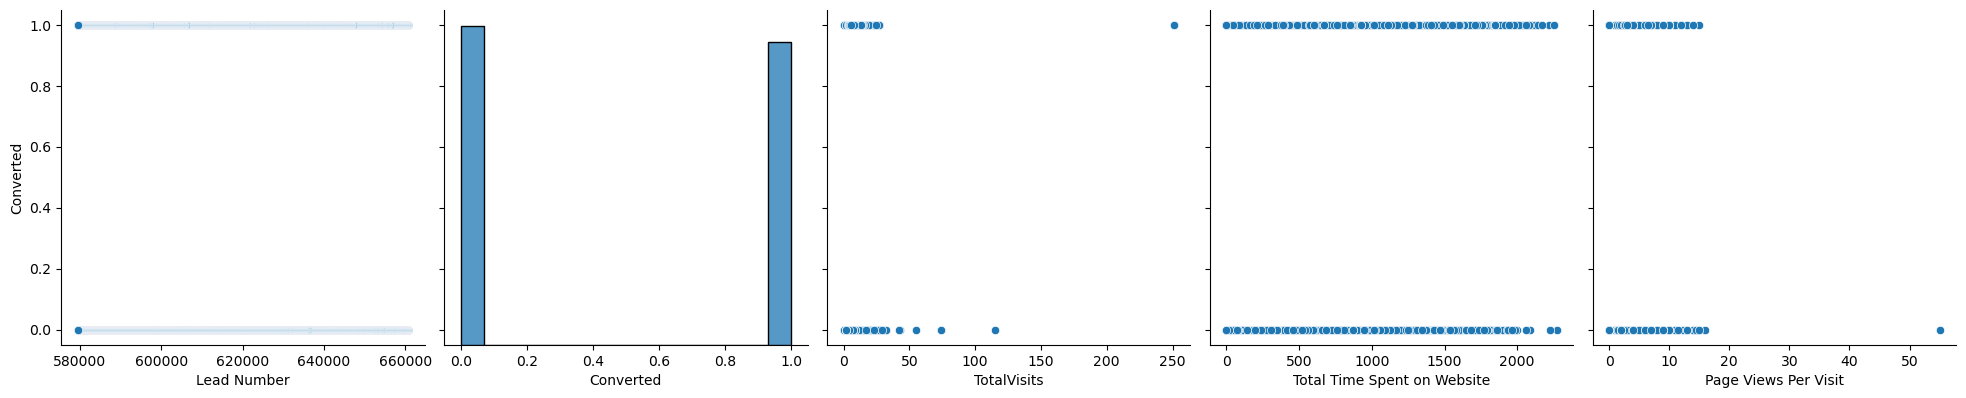

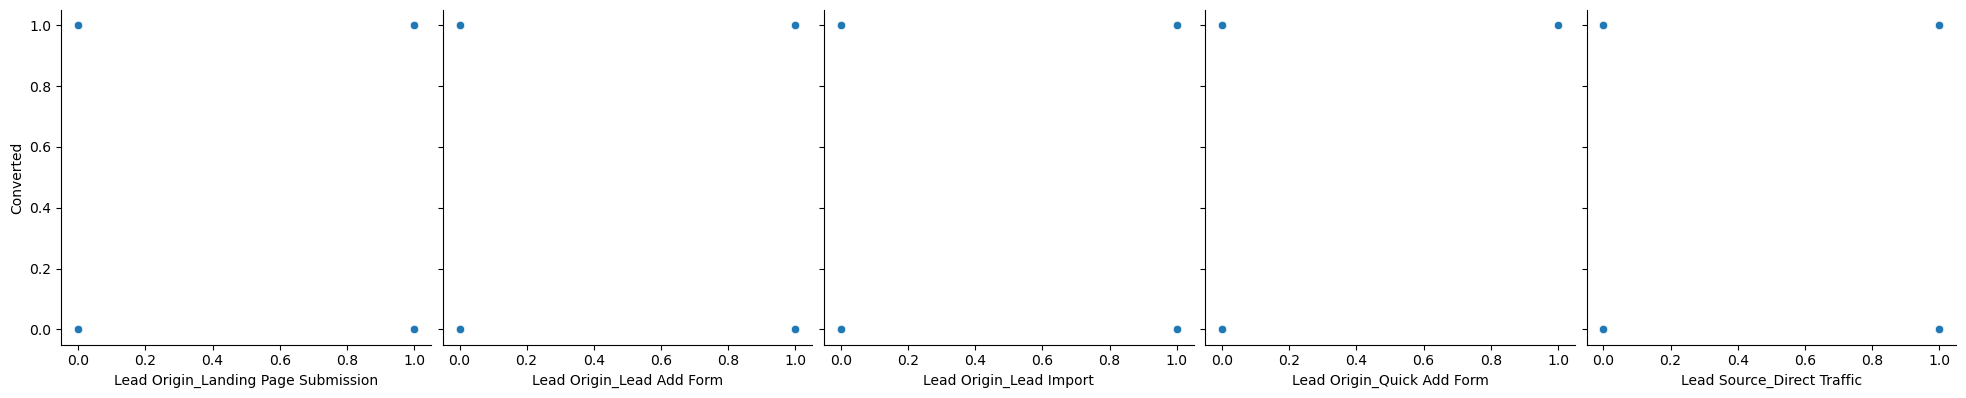

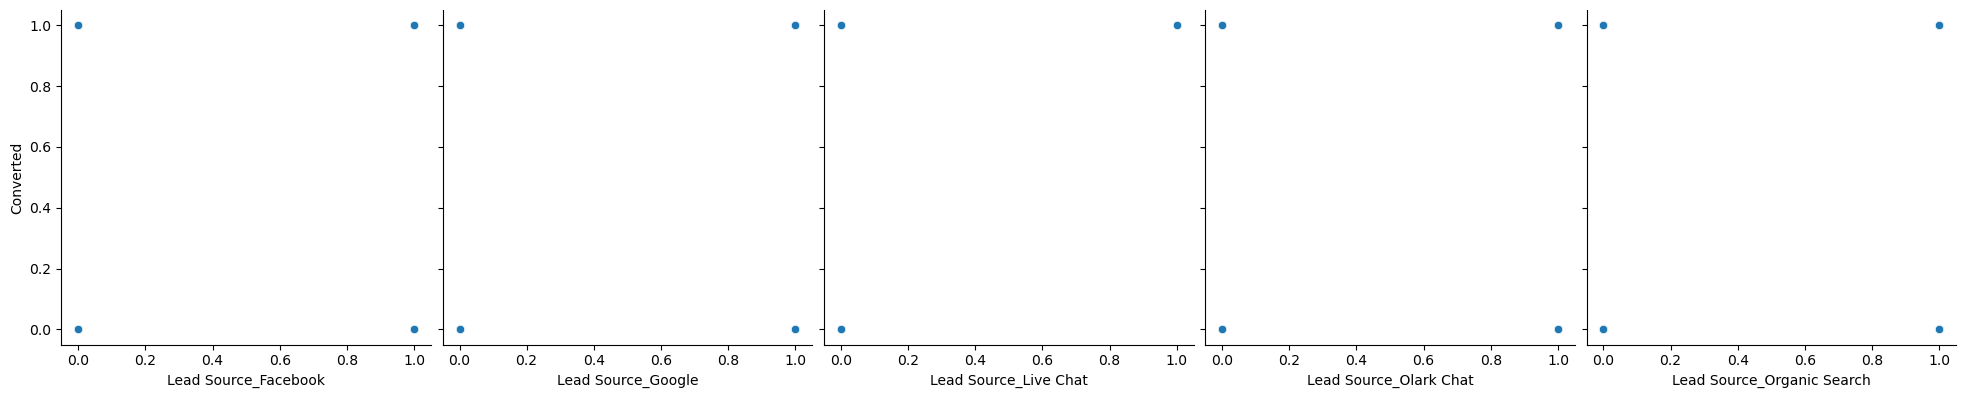

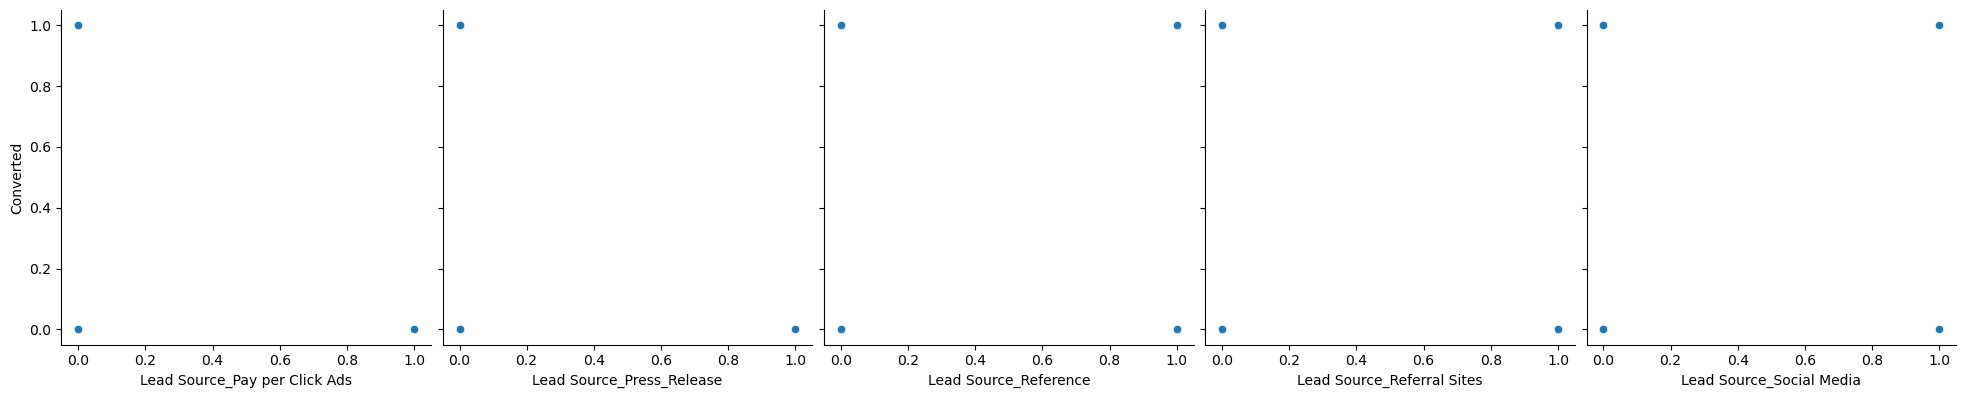

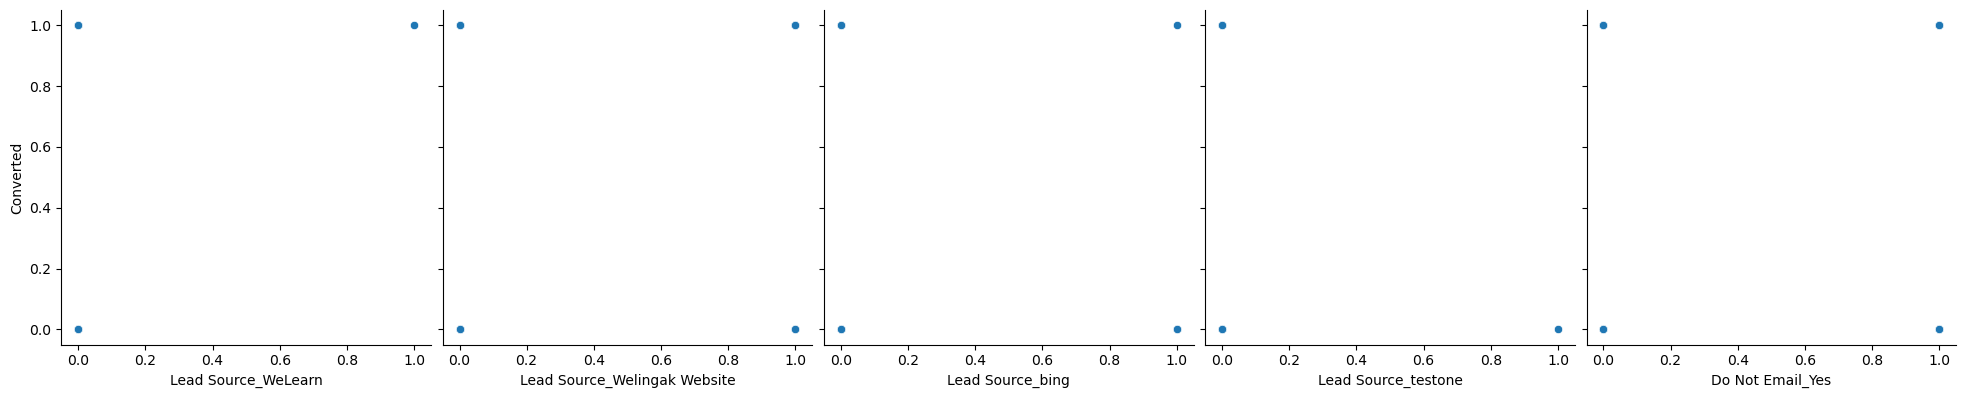

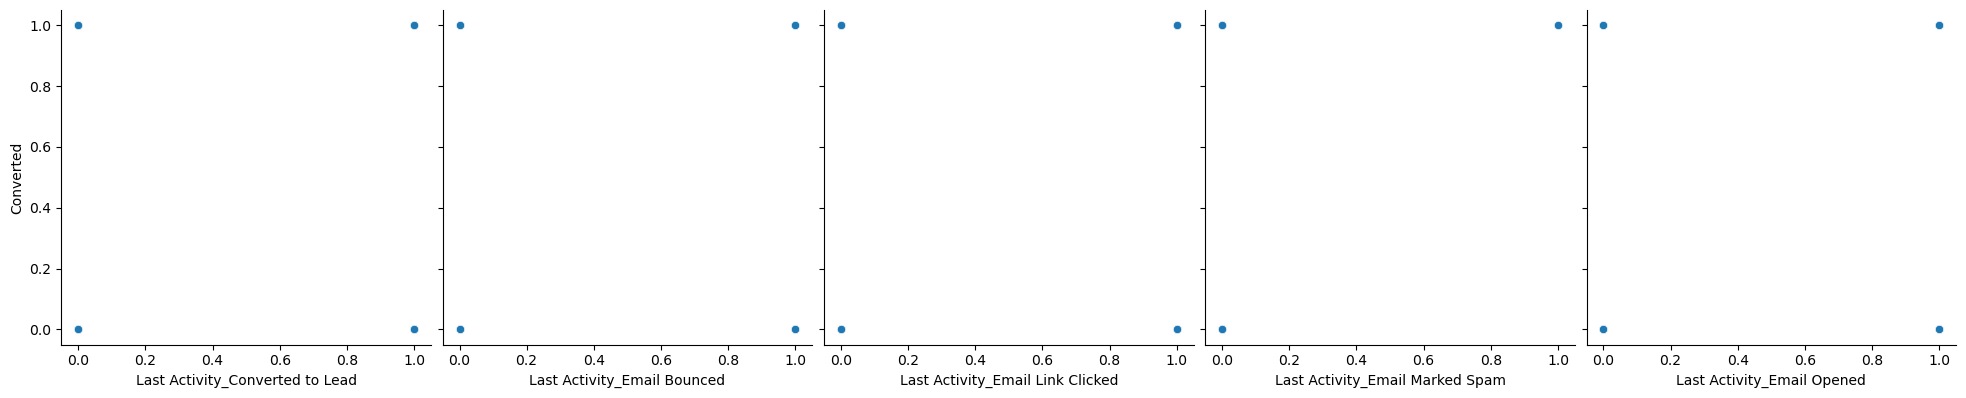

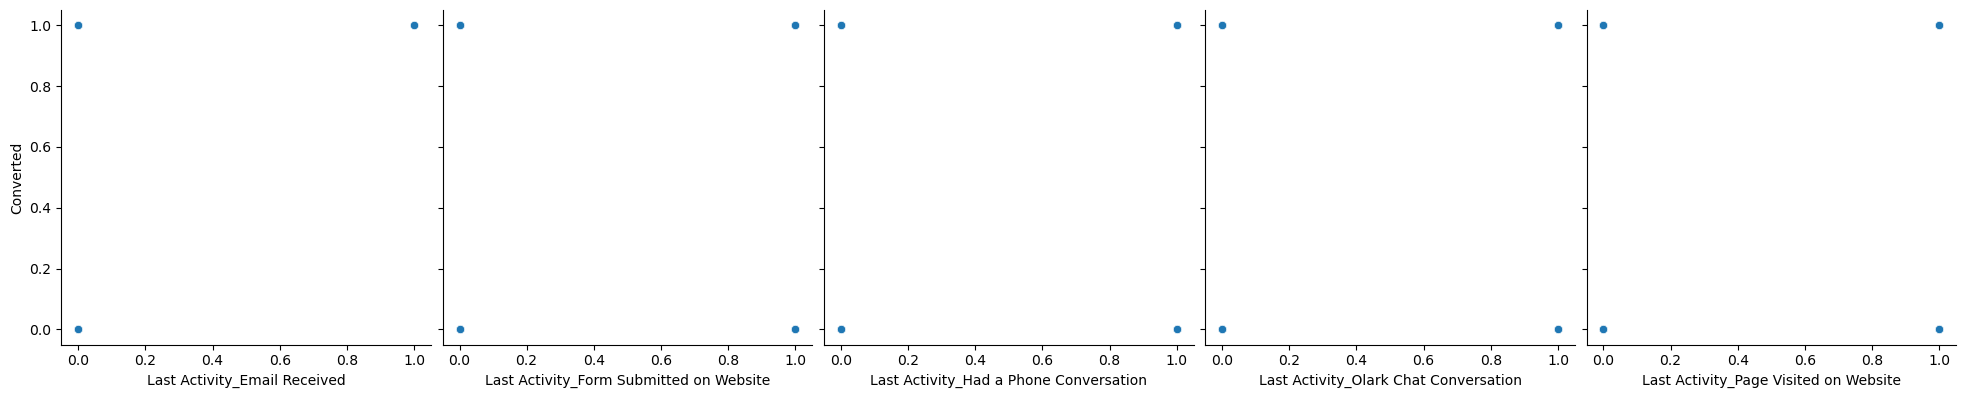

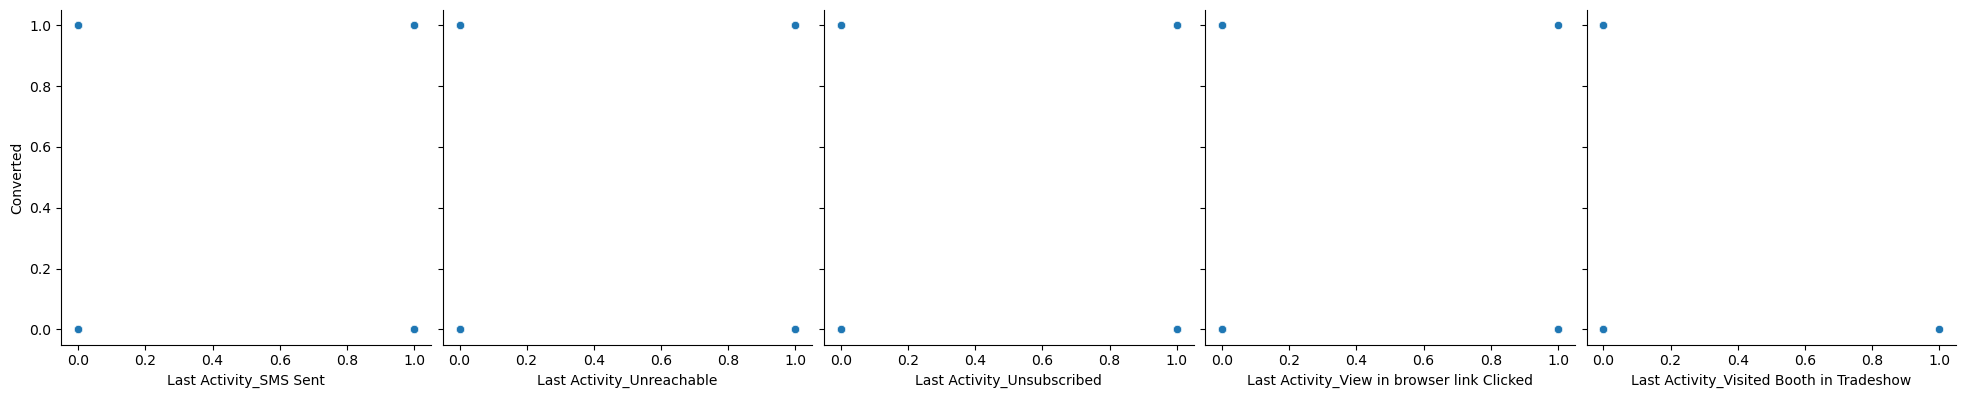

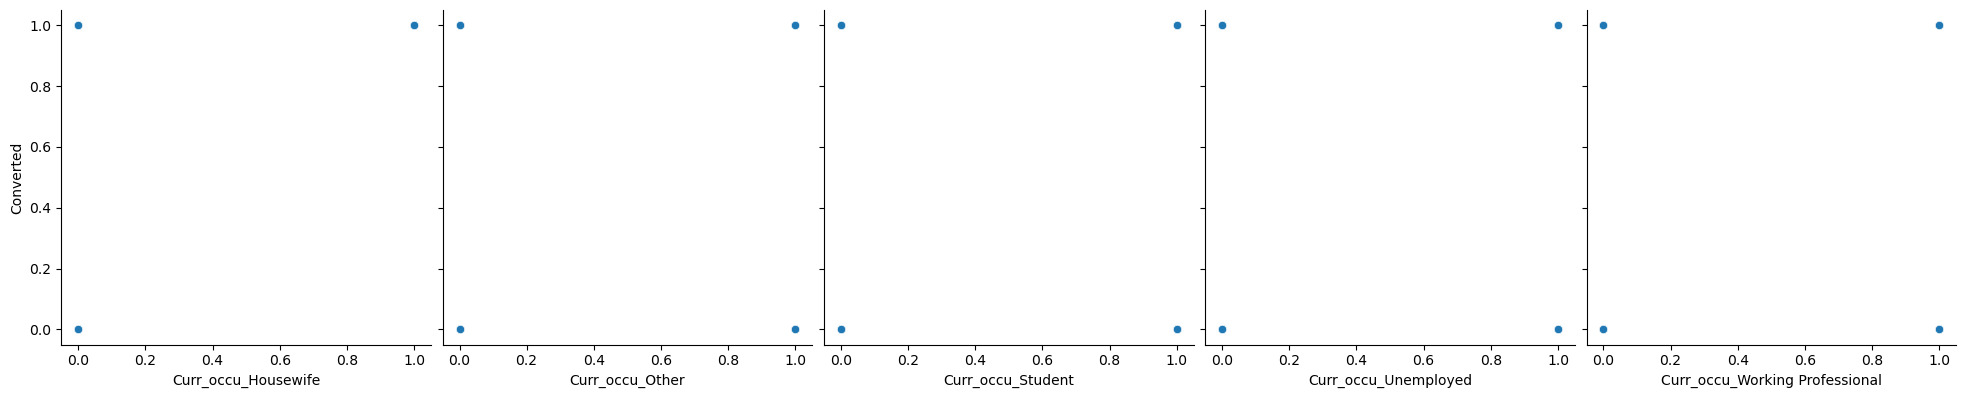

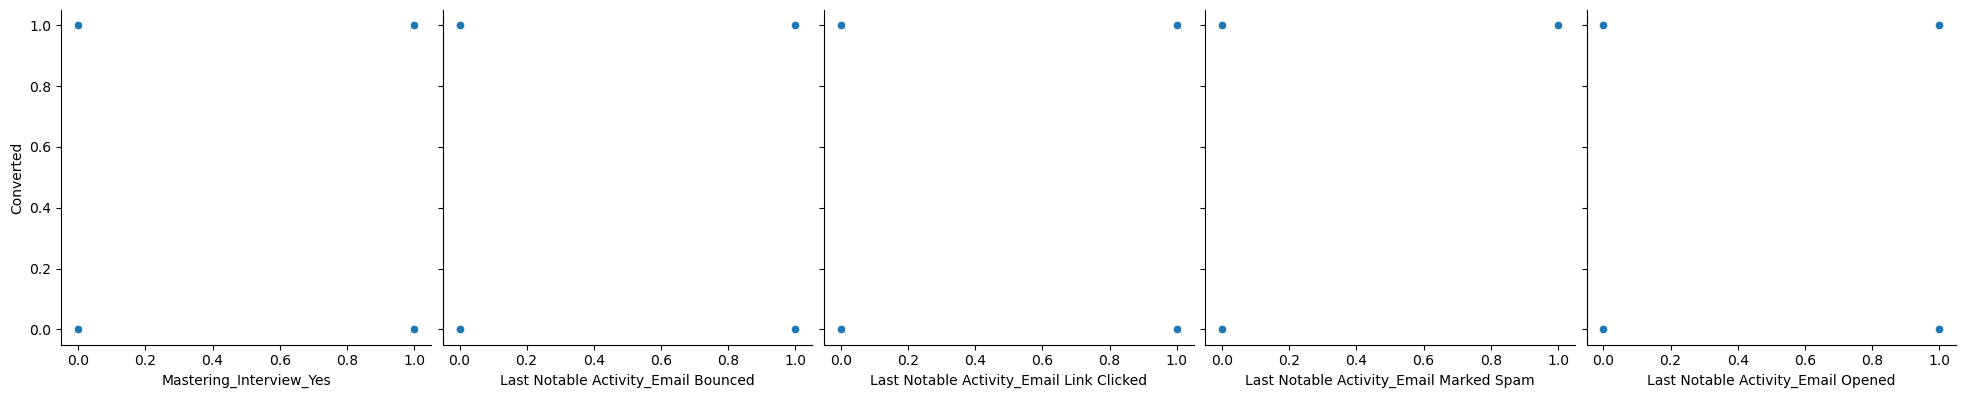

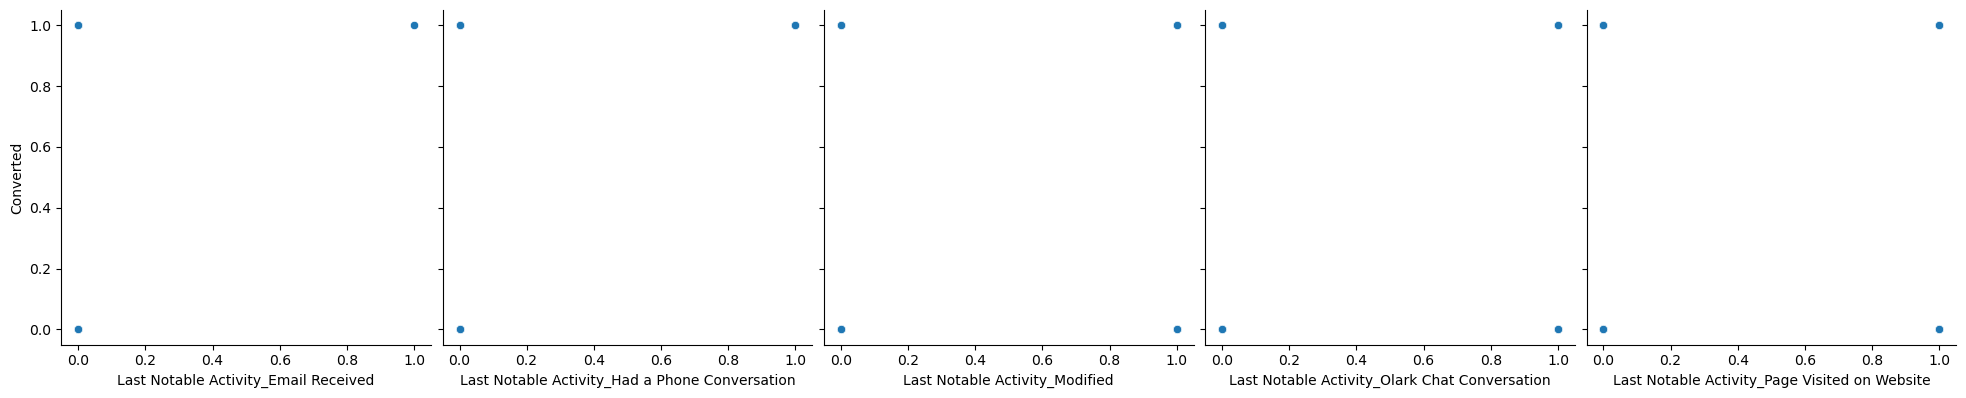

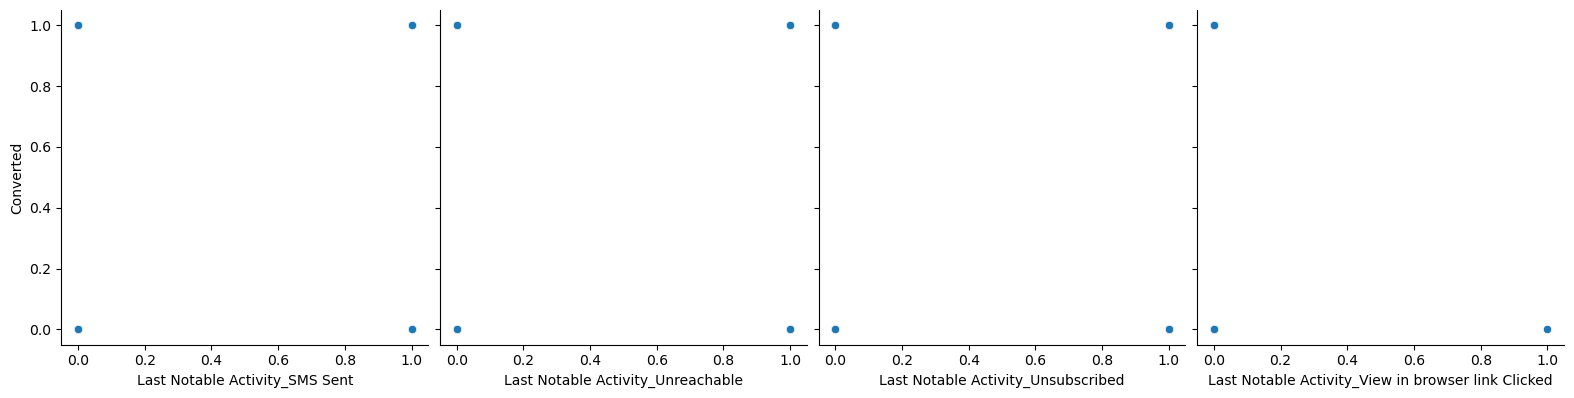

In [57]:
for i, group in enumerate(variable_group, 1):
    sns.pairplot(Leads_Transformed, x_vars=group, y_vars="Converted", size=4, kind='scatter', aspect=1)
    plt.show()

#### Train-Test Split

In [59]:
### creating X & y 
X = Leads_Transformed.drop(["Lead Number","Converted"], axis=1)
y = Leads_Transformed["Converted"]

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [139]:
print("Train dataset size: ", X_train.shape)
print("Test dataset size:  ", X_test.shape)

Train dataset size:  (5240, 57)
Test dataset size:   (1310, 57)


##### Scaling

In [141]:
scaler = StandardScaler()
X_train[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]] = scaler.fit_transform(X_train[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]])

In [143]:
### Percentage of successful Leads
Success = (sum(Leads_Transformed["Converted"])/len(Leads_Transformed["Converted"].index))*100
Success

48.717557251908396

#### Building the First Model

In [145]:
X_train_sm = sm.add_constant(X_train)

In [147]:
model1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res1 = model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5240
Model:                            GLM   Df Residuals:                     5188
Model Family:                Binomial   Df Model:                           51
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 16 Dec 2024   Deviance:                   1.2729e+05
Time:                        01:21:44   Pearson chi2:                 6.22e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                               3.217e+15   5.13e+07   6.27e+07      0.000    3.22e+15    3.22e+15
TotalVisits                                         7.952e+13   1.25e+06   6.36e+07      0.000    7.95e+13    7.95e+13
Total Time Spent on Website                         1.829e+14   1.04e+06   1.75e+08      0.000    1.83e+14    1.83e+14
Page Views Per Visit                                4.488e+12   1.37e+06   3.27e+06      0.000    4.49e+12    4.49e+12
Lead Origin_Landing Page Submission                -5.596e+13   2.94e+06   -1.9e+07      0.000    -5.6e+13    -5.6e+13
Lead Origin_Lead Add Form                           2.021e+15   1.38e+07   1.47e+08      0.000    2.02e+15    2.02e+15
Lead Origin_Lead Import                             1.222e+15   2.13e+07   5.73e+07      0.000    1.22e+15    1.22e+15
Lead Origin_Quick Add Form                           1.89e+15   6.75e+07    2.8e+07      0.000    1.89e+15    1.89e+15
Lead Source_Direct Traffic                          1.549e+15   4.12e+07   3.76e+07      0.000    1.55e+15    1.55e+15
Lead Source_Facebook                                1.222e+15   2.13e+07   5.73e+07      0.000    1.22e+15    1.22e+15
Lead Source_Google                                  1.534e+15   4.11e+07   3.74e+07      0.000    1.53e+15    1.53e+15
Lead Source_Live Chat                               3.498e+15   6.13e+07    5.7e+07      0.000     3.5e+15     3.5e+15
Lead Source_Olark Chat                              9.437e+14   4.13e+07   2.29e+07      0.000    9.44e+14    9.44e+14
Lead Source_Organic Search                          1.488e+15   4.12e+07   3.61e+07      0.000    1.49e+15    1.49e+15
Lead Source_Pay per Click Ads                      -2.415e+15   7.87e+07  -3.07e+07      0.000   -2.42e+15   -2.42e+15
Lead Source_Press_Release                            -15.9812   2.69e-07  -5.95e+07      0.000     -15.981     -15.981
Lead Source_Reference                               8.475e+14   3.89e+07   2.18e+07      0.000    8.48e+14    8.48e+14
Lead Source_Referral Sites                          1.665e+15   4.21e+07   3.96e+07      0.000    1.66e+15    1.66e+15
Lead Source_Social Media                            1.842e+15   6.29e+07   2.93e+07      0.000    1.84e+15    1.84e+15
Lead Source_WeLearn                                  6.28e+15   7.87e+07   7.98e+07      0.000    6.28e+15    6.28e+15
Lead Source_Welingak Website                        9.942e+14   3.94e+07   2.53e+07      0.000    9.94e+14    9.94e+14
Lead Source_bing                                    -2.39e+15   7.87e+07  -3.03e+07      0.000   -2.39e+15   -2.39e+15
Lead Source_testone                                -2.256e+15   7.89e+07  -2.86e+07      0.000   -2.26e+15  

#### Feature Selection using RFE - automated process

In [149]:
logreg = LogisticRegression()

rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [151]:
cols = X_train.columns[rfe.support_]
print(cols)

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Curr_occu_Housewife', 'Curr_occu_Unemployed',
       'Curr_occu_Working Professional', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')


#### Model2 after feature selection

In [129]:
X_train_sm = sm.add_constant(X_train[cols])
model2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5240
Model:                            GLM   Df Residuals:                     5224
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2407.2
Date:                Mon, 16 Dec 2024   Deviance:                       4814.5
Time:                        01:16:07   Pearson chi2:                 5.67e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3727
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.8764      0.189     -4.635      0.000      -1.247      -0.506
Total Time Spent on Website                        1.1142      0.043     25.937      0.000       1.030       1.198
Lead Origin_Lead Add Form                          3.4099      0.188     18.102      0.000       3.041       3.779
Lead Source_Olark Chat                             1.3204      0.111     11.944      0.000       1.104       1.537
Lead Source_Welingak Website                       2.6665      1.024      2.605      0.009       0.660       4.673
Do Not Email_Yes                                  -1.2945      0.193     -6.693      0.000      -1.674      -0.915
Last Activity_Converted to Lead                   -1.2160      0.209     -5.824      0.000      -1.625      -0.807
Last Activity_Email Bounced                       -1.3375      0.425     -3.151      0.002      -2.170      -0.506
Last Activity_Olark Chat Conversation             -1.1501      0.167     -6.886      0.000      -1.477      -0.823
Last Activity_SMS Sent                             1.0292      0.078     13.126      0.000       0.876       1.183
Curr_occu_Housewife                               23.5897   2.29e+04      0.001      0.999   -4.48e+04    4.49e+04
Curr_occu_Unemployed                              -0.0331      0.190     -0.175      0.861      -0.405       0.338
Curr_occu_Working Professional                     2.4520      0.250      9.790      0.000       1.961       2.943
Last Notable Activity_Email Bounced                1.7058      0.588      2.901      0.004       0.553       2.858
Last Notable Activity_Had a Phone Conversation    23.5296   2.16e+04      0.001      0.999   -4.23e+04    4.24e+04
Last Notable Activity_Unreachable                  2.8072      0.787      3.567      0.000       1.265       4.350
==================================================================================================================
"""

In [156]:
#### Drop the feature, "Curr_occu_Housewife" due to high p value
cols = cols.drop("Curr_occu_Housewife", 1)

#### Model3 after dropping feature 'Curr_occu_Housewife"

In [162]:
X_train_sm = sm.add_constant(X_train[cols])

model3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res3 = model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5240
Model:                            GLM   Df Residuals:                     5225
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2412.8
Date:                Mon, 16 Dec 2024   Deviance:                       4825.5
Time:                        01:25:54   Pearson chi2:                 5.69e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3714
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.7598      0.183     -4.153      0.000      -1.118      -0.401
Total Time Spent on Website                        1.1130      0.043     25.934      0.000       1.029       1.197
Lead Origin_Lead Add Form                          3.4184      0.188     18.171      0.000       3.050       3.787
Lead Source_Olark Chat                             1.3114      0.110     11.877      0.000       1.095       1.528
Lead Source_Welingak Website                       2.6554      1.024      2.594      0.009       0.649       4.662
Do Not Email_Yes                                  -1.2966      0.193     -6.704      0.000      -1.676      -0.918
Last Activity_Converted to Lead                   -1.2228      0.209     -5.860      0.000      -1.632      -0.814
Last Activity_Email Bounced                       -1.3471      0.424     -3.174      0.002      -2.179      -0.515
Last Activity_Olark Chat Conversation             -1.1596      0.167     -6.943      0.000      -1.487      -0.832
Last Activity_SMS Sent                             1.0255      0.078     13.081      0.000       0.872       1.179
Curr_occu_Unemployed                              -0.1463      0.184     -0.796      0.426      -0.507       0.214
Curr_occu_Working Professional                     2.3382      0.246      9.505      0.000       1.856       2.820
Last Notable Activity_Email Bounced                1.7132      0.588      2.914      0.004       0.561       2.865
Last Notable Activity_Had a Phone Conversation    22.5266   1.31e+04      0.002      0.999   -2.57e+04    2.57e+04
Last Notable Activity_Unreachable                  2.8027      0.787      3.561      0.000       1.260       4.346
==================================================================================================================
"""

In [164]:
#### Drop feature, "Last Notable Activity_Had a Phone Conversation" due to high p value
cols = cols.drop("Last Notable Activity_Had a Phone Conversation", 1)

#### Model 4 after dropping feature, "Last Notable Activity_Had a Phone Conversation"

In [170]:
X_train_sm = sm.add_constant(X_train[cols])

model4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res4 = model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5240
Model:                            GLM   Df Residuals:                     5226
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2418.5
Date:                Mon, 16 Dec 2024   Deviance:                       4837.1
Time:                        01:28:50   Pearson chi2:                 5.70e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3700
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7560      0.183     -4.133      0.000      -1.115      -0.397
Total Time Spent on Website               1.1131      0.043     25.974      0.000       1.029       1.197
Lead Origin_Lead Add Form                 3.4127      0.188     18.145      0.000       3.044       3.781
Lead Source_Olark Chat                    1.3067      0.110     11.849      0.000       1.091       1.523
Lead Source_Welingak Website              2.6561      1.024      2.595      0.009       0.650       4.662
Do Not Email_Yes                         -1.2991      0.193     -6.720      0.000      -1.678      -0.920
Last Activity_Converted to Lead          -1.2317      0.209     -5.904      0.000      -1.641      -0.823
Last Activity_Email Bounced              -1.3522      0.424     -3.187      0.001      -2.184      -0.521
Last Activity_Olark Chat Conversation    -1.1656      0.167     -6.980      0.000      -1.493      -0.838
Last Activity_SMS Sent                    1.0175      0.078     12.992      0.000       0.864       1.171
Curr_occu_Unemployed                     -0.1409      0.184     -0.767      0.443      -0.501       0.219
Curr_occu_Working Professional            2.3431      0.246      9.528      0.000       1.861       2.825
Last Notable Activity_Email Bounced       1.7131      0.588      2.914      0.004       0.561       2.865
Last Notable Activity_Unreachable         2.7939      0.787      3.550      0.000       1.251       4.337
=========================================================================================================
"""

In [172]:
### Drop the feature, "Curr_occu_Unemployed" due to high value
cols = cols.drop("Curr_occu_Unemployed", 1)

#### Model 5 after dropping feature, "Curr_occu_Unemployed"

In [176]:
X_train_sm = sm.add_constant(X_train[cols])

model5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res5 = model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5240
Model:                            GLM   Df Residuals:                     5227
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2418.8
Date:                Mon, 16 Dec 2024   Deviance:                       4837.7
Time:                        01:32:08   Pearson chi2:                 5.70e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3699
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.8903      0.054    -16.629      0.000      -0.995      -0.785
Total Time Spent on Website               1.1133      0.043     25.981      0.000       1.029       1.197
Lead Origin_Lead Add Form                 3.4180      0.188     18.186      0.000       3.050       3.786
Lead Source_Olark Chat                    1.3105      0.110     11.894      0.000       1.095       1.526
Lead Source_Welingak Website              2.6475      1.024      2.586      0.010       0.641       4.654
Do Not Email_Yes                         -1.3012      0.193     -6.731      0.000      -1.680      -0.922
Last Activity_Converted to Lead          -1.2328      0.209     -5.908      0.000      -1.642      -0.824
Last Activity_Email Bounced              -1.3490      0.425     -3.176      0.001      -2.181      -0.517
Last Activity_Olark Chat Conversation    -1.1608      0.167     -6.958      0.000      -1.488      -0.834
Last Activity_SMS Sent                    1.0122      0.078     12.980      0.000       0.859       1.165
Curr_occu_Working Professional            2.4781      0.172     14.428      0.000       2.141       2.815
Last Notable Activity_Email Bounced       1.7090      0.588      2.906      0.004       0.556       2.862
Last Notable Activity_Unreachable         2.7887      0.787      3.544      0.000       1.246       4.331
=========================================================================================================
"""

In [179]:
### calculate VIF

vif_data = pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
print(vif_data)

                                  Feature       VIF
0                                   const  2.398214
1             Total Time Spent on Website  1.218936
2               Lead Origin_Lead Add Form  1.368339
3                  Lead Source_Olark Chat  1.269831
4            Lead Source_Welingak Website  1.227360
5                        Do Not Email_Yes  1.566110
6         Last Activity_Converted to Lead  1.060501
7             Last Activity_Email Bounced  1.878877
8   Last Activity_Olark Chat Conversation  1.149242
9                  Last Activity_SMS Sent  1.118772
10         Curr_occu_Working Professional  1.080477
11    Last Notable Activity_Email Bounced  1.332965
12      Last Notable Activity_Unreachable  1.004030


In [182]:
### Getting Predicted value on train set

y_train_pred = res5.predict(X_train_sm)

In [185]:
### reshaping
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.1341373 , 0.75881762, 0.01801413, ..., 0.88275763, 0.99406435,
       0.13781579])

In [188]:
y_train_l = y_train.tolist()

#### Creating a dataframe with actual Lead converted and the predicted probabilities

In [193]:
y_train_pred_final = pd.DataFrame({"Lead":y_train.values, "Lead_prob":y_train_pred})
y_train_pred_final["Lead Number"] = y_train.index
y_train_pred_final.head()

,Lead,Lead_prob,Lead Number
0,0,0.134137,3587
1,1,0.758818,8993
2,0,0.018014,7788
3,0,0.140979,1972
4,1,0.315107,6147


#### Creating a new column 'predicted' with 1 if Lead probability is > 43% else 0

In [345]:
y_train_pred_final["Predicted"] = y_train_pred_final.Lead_prob.map(lambda x: 1 if x > 0.43 else 0)
y_train_pred_final.head()

,Lead,Lead_prob,Lead Number,Predicted
0,0,0.134137,3587,0
1,1,0.758818,8993,1
2,0,0.018014,7788,0
3,0,0.140979,1972,0
4,1,0.315107,6147,0


#### Create confusion matrix

In [347]:
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.Predicted)
print("Confusion matrix for the model: \n ", confusion)

Confusion matrix for the model: 
  [[2142  569]
 [ 535 1994]]


#### Calculating Accuracy of the model

In [349]:
accuracy = metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.Predicted)
print("Accuracy score for the model : ", accuracy)

Accuracy score for the model :  0.7893129770992366


#### Determining other metrics of the model

In [351]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [353]:
#### Sensitivity
Sensitivity = TP/(TP+FN)
Sensitivity

0.7884539343614076

In [355]:
#### Specificity
Specificity = TN/(TN+FP)
Specificity

0.7901143489487275

In [357]:
#### False positivity Rate
print(FP/(FP+TN))

0.2098856510512726


In [361]:
#### Total positive prediction
print(TP/(TP+FP))

0.77799453765119


In [363]:
### Total False prediction
print(TN/(TN+FN))

0.8001494209936496


In [365]:
#### Precision
precision_score(y_train_pred_final.Lead, y_train_pred_final.Predicted)

0.77799453765119

In [367]:
#### Recall
recall_score(y_train_pred_final.Lead, y_train_pred_final.Predicted)

0.7884539343614076

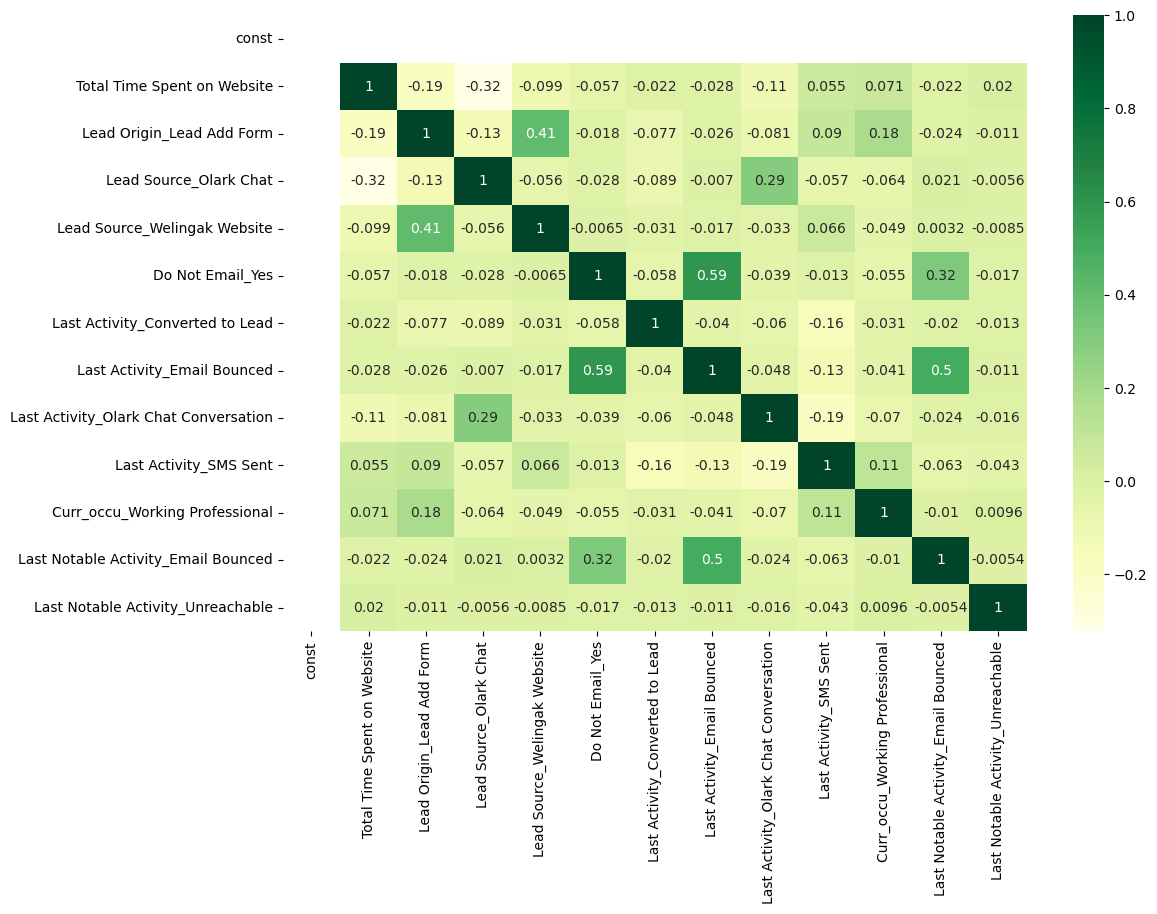

In [276]:
plt.figure(figsize=(12,8))
sns.heatmap(X_train_sm.corr(), annot=True, cmap="YlGn")
plt.show()

In [279]:
#### Precision & Recall curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Lead, y_train_pred_final.Lead_prob)

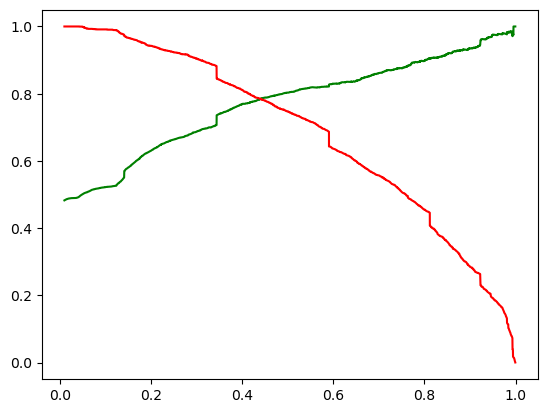

In [282]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()